<a href="https://colab.research.google.com/github/imdineshkumar24/Deep_learning_lab_exp/blob/main/dl_lab_ex_no_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.metrics import classification_report

In [ ]:
X, y = make_classification(n_samples=100000, n_features=32,
n_informative=32,n_redundant=0, n_repeated=0, n_classes=2,n_clusters_per_class=1,
                           weights=[0.995, 0.005],class_sep=0.5, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [ ]:
X_train.shape[0]

80000

In [ ]:
X_test.shape[0]

20000

In [ ]:
X_train_normal = X_train[np.where(y_train == 0)]

In [ ]:
input = tf.keras.layers.Input(shape=(32,))

In [ ]:
encoder = tf.keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(8, activation="relu"),
layers.Dense(4, activation="relu")])(input)

In [ ]:
decoder = tf.keras.Sequential([layers.Dense(8, activation="relu"),
                               layers.Dense(16, activation="relu"),
                               layers.Dense(32, activation="sigmoid")])(encoder)

In [ ]:
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)

In [ ]:
autoencoder.compile(optimizer="adam", loss='mae')

In [ ]:
history = autoencoder.fit(X_train_normal, X_train_normal,
 epochs=20,
 batch_size=64,
 validation_data=(X_test, X_test),
shuffle=True)

Epoch 1/20
1238/1238 [==============================] - 4s 3ms/step - loss: 2.5370 - val_loss: 2.5135
Epoch 2/20
1238/1238 [==============================] - 3s 2ms/step - loss: 2.5062 - val_loss: 2.5068
Epoch 3/20
1238/1238 [==============================] - 3s 2ms/step - loss: 2.5014 - val_loss: 2.5036
Epoch 4/20
1238/1238 [==============================] - 3s 2ms/step - loss: 2.4982 - val_loss: 2.5009
Epoch 5/20
1238/1238 [==============================] - 3s 2ms/step - loss: 2.4947 - val_loss: 2.4967
Epoch 6/20
1238/1238 [==============================] - 3s 3ms/step - loss: 2.4855 - val_loss: 2.4822
Epoch 7/20
1238/1238 [==============================] - 3s 2ms/step - loss: 2.4767 - val_loss: 2.4790
Epoch 8/20
1238/1238 [==============================] - 3s 2ms/step - loss: 2.4743 - val_loss: 2.4774
Epoch 9/20
1238/1238 [==============================] - 2s 2ms/step - loss: 2.4729 - val_loss: 2.4766
Epoch 10/20
1238/1238 [==============================] - 3s 3ms/step - loss: 2.471

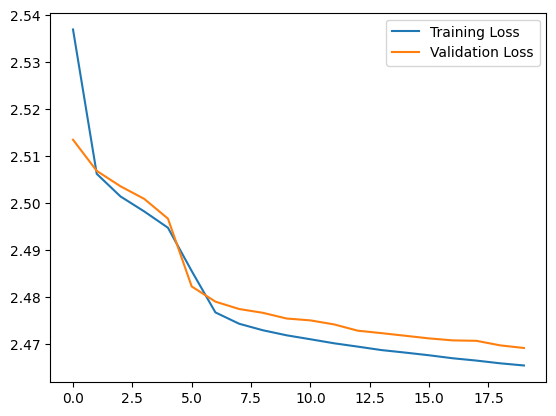

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
prediction = autoencoder.predict(X_test)
prediction_loss = tf.keras.losses.mae(prediction, X_test)

625/625 [==============================] - 1s 1ms/step


In [ ]:
loss_threshold = np.percentile(prediction_loss, 98)
print(f"The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}")

The prediction loss threshold for 2% of outliers is 3.47


<Axes: ylabel='Count'>

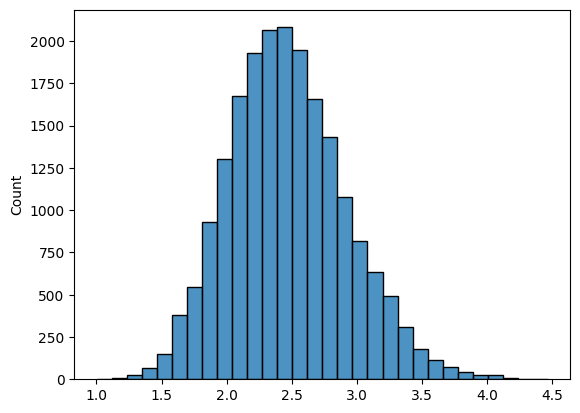

In [ ]:
sns.histplot(prediction_loss, bins=30, alpha=0.8)

In [ ]:
threshold_prediction = [0 if i < loss_threshold else 1 for i in prediction_loss]
print(classification_report(y_test, threshold_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19803
           1       0.00      0.01      0.00       197

    accuracy                           0.97     20000
   macro avg       0.50      0.49      0.49     20000
weighted avg       0.98      0.97      0.98     20000



fatal: destination path 'Deep_learning_lab_exp' already exists and is not an empty directory.
